### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(["EIN", "NAME"], 1)
application_df.head()

C:\Users\itzmi\.conda\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at INCOME_AMT value counts
income_amt_counts = application_df["INCOME_AMT"].value_counts()
income_amt_counts

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

In [5]:
# From the above cell we can try binning APPLICATION_TYPE, CLASSIFICATION and ASK_AMT. 
# Income amt unique values are within 10 so it need not be binned.
# Deliverable 1 and 2 already considered binning APPLICATION_TYPE, CLASSIFICATION, so lets try doing the same with ASK_AMT

# Look at ASK_AMT value counts for binning
ask_amt_counts = application_df["ASK_AMT"].value_counts()
ask_amt_counts


5000        25398
10478           3
15583           3
63981           3
6725            3
            ...  
5371754         1
30060           1
43091152        1
18683           1
36500179        1
Name: ASK_AMT, Length: 8747, dtype: int64

<AxesSubplot:ylabel='Density'>

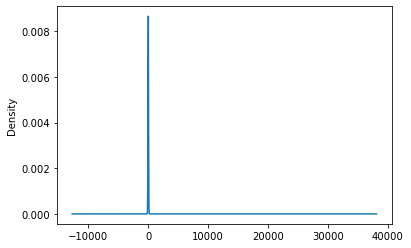

In [6]:
# Visualize the value counts of ASK_AMT
ask_amt_counts.plot.density()

In [7]:
# Determine which values to replace if counts are less than ...?
replace_ask_amt = list(ask_amt_counts[ask_amt_counts < 1000].index)
replace_ask_amt

[10478,
 15583,
 63981,
 6725,
 7003,
 42072,
 5731,
 46327,
 39122,
 11839,
 6742,
 21264,
 86039,
 73987,
 9537,
 29130,
 206725,
 13420,
 136341,
 80599,
 12584,
 7686,
 20834,
 17614,
 31453,
 42962,
 26432,
 18063,
 23202,
 6960,
 5297,
 21389,
 246851,
 94253,
 6000,
 146824,
 12753,
 15039,
 39168,
 47129,
 10070,
 43814,
 34875,
 5706,
 6279,
 17010,
 184668,
 5470,
 54024,
 20150,
 90834,
 120158,
 6035,
 42178,
 13681,
 13831,
 27073,
 64471,
 5175,
 22579,
 83211,
 35734,
 5170,
 36683,
 51366,
 50890,
 34995,
 32141,
 6920,
 8632,
 83827,
 67367,
 59647,
 6398,
 15722,
 31549,
 13898,
 238933,
 7187,
 16071,
 13499,
 24459,
 27441,
 14000,
 18985,
 63520,
 5179,
 14765,
 201112,
 350000,
 32507,
 8746,
 22472,
 7049,
 6405,
 27944,
 34792,
 57588,
 73627,
 32807,
 16200,
 12238,
 64093,
 41894,
 57957,
 34538,
 9413,
 57689,
 15372,
 61397,
 1427468,
 24105,
 5130,
 5548,
 9323,
 16435,
 19704,
 16482,
 56135,
 37390,
 60000,
 195661,
 18826,
 6010,
 9255,
 7287,
 210432,
 

In [8]:

# Replace in dataframe
# Lets try to bin them similar to what we see in INCOME_AMT bins.


for amt in replace_ask_amt:
    if amt <= 49999:
        application_df.ASK_AMT = application_df.ASK_AMT.replace(amt,str("5001-49999"))
    elif amt <= 99999:
        application_df.ASK_AMT = application_df.ASK_AMT.replace(amt,str("50000-99999"))
    elif amt <= 499999:
        application_df.ASK_AMT = application_df.ASK_AMT.replace(amt,str("100000-499999"))
    elif amt <= 999999:
        application_df.ASK_AMT = application_df.ASK_AMT.replace(amt,str("500000-999999"))
    elif amt <= 4999999:
        application_df.ASK_AMT = application_df.ASK_AMT.replace(amt,str("1M-5M"))
    elif amt <= 9999999:
        application_df.ASK_AMT = application_df.ASK_AMT.replace(amt,str("5M-10M"))
    elif amt <= 49999999:
        application_df.ASK_AMT = application_df.ASK_AMT.replace(amt,str("10M-50M"))
    else:
        application_df.ASK_AMT = application_df.ASK_AMT.replace(amt,str("50M+"))
    
application_df.ASK_AMT = application_df.ASK_AMT.astype(str)

# Check to make sure binning was successful
application_df.ASK_AMT.value_counts()

5000             25398
5001-49999        2947
100000-499999     2305
50000-99999       1421
1M-5M              940
500000-999999      651
10M-50M            258
5M-10M             225
50M+               154
Name: ASK_AMT, dtype: int64

In [9]:
# Look at APPLICATION_TYPE value counts for binning
application_type_counts = application_df["APPLICATION_TYPE"].value_counts()
application_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

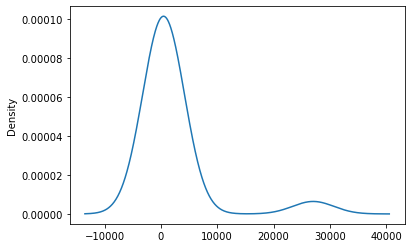

In [10]:
# Visualize the value counts of APPLICATION_TYPE
application_type_counts.plot.density()

In [11]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_type_counts[application_type_counts < 200].index)


# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [12]:
# Look at CLASSIFICATION value counts for binning

classification_counts = application_df["CLASSIFICATION"].value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

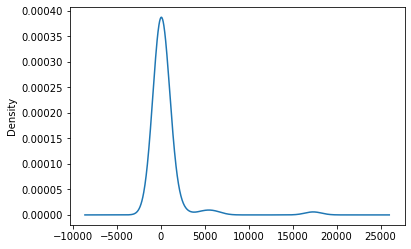

In [13]:
# Visualize the value counts of CLASSIFICATION

classification_counts.plot.density()

In [14]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts < 1800].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [15]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS',
 'ASK_AMT']

In [16]:
application_df[application_cat].nunique()

APPLICATION_TYPE          9
AFFILIATION               6
CLASSIFICATION            6
USE_CASE                  5
ORGANIZATION              4
INCOME_AMT                9
SPECIAL_CONSIDERATIONS    2
ASK_AMT                   9
dtype: int64

In [17]:

# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()


C:\Users\itzmi\.conda\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,SPECIAL_CONSIDERATIONS_Y,ASK_AMT_100000-499999,ASK_AMT_10M-50M,ASK_AMT_1M-5M,ASK_AMT_5000,ASK_AMT_50000-99999,ASK_AMT_500000-999999,ASK_AMT_5001-49999,ASK_AMT_50M+,ASK_AMT_5M-10M
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

C:\Users\itzmi\.conda\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,STATUS,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,SPECIAL_CONSIDERATIONS_Y,ASK_AMT_100000-499999,ASK_AMT_10M-50M,ASK_AMT_1M-5M,ASK_AMT_5000,ASK_AMT_50000-99999,ASK_AMT_500000-999999,ASK_AMT_5001-49999,ASK_AMT_50M+,ASK_AMT_5M-10M
0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# Split our preprocessed data into our features and target arrays
y = application_df.IS_SUCCESSFUL
X = application_df.drop("IS_SUCCESSFUL",axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [20]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Trying with tanh first and 2 hidden layers

In [21]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh")
)


# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                4160      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 6,621
Trainable params: 6,621
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/optimized1.weights.{epoch:05d}.hdf5"



# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch', period=5)

In [23]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 1s 697us/step - loss: 0.5719 - accuracy: 0.7204
Epoch 2/100
804/804 [==============================] - 1s 699us/step - loss: 0.5549 - accuracy: 0.7285
Epoch 3/100
804/804 [==============================] - 1s 694us/step - loss: 0.5505 - accuracy: 0.7307
Epoch 4/100
804/804 [==============================] - 1s 695us/step - loss: 0.5485 - accuracy: 0.7326
Epoch 5/100
731/804 [==========================>...] - ETA: 0s - loss: 0.5479 - accuracy: 0.7305
Epoch 5: saving model to checkpoints\optimized1.weights.00005.hdf5
804/804 [==============================] - 1s 704us/step - loss: 0.5472 - accuracy: 0.7315
Epoch 6/100
804/804 [==============================] - 1s 701us/step - loss: 0.5450 - accuracy: 0.7333
Epoch 7/100
804/804 [==============================] - 1s 700us/step - loss: 0.5439 - accuracy: 0.7363
Epoch 8/100
804/804 [==============================] - 1s 696us/step - loss: 0.5430 - accuracy: 0.7362
Epoch 9/100
804/804 [===

804/804 [==============================] - 1s 850us/step - loss: 0.5239 - accuracy: 0.7463
Epoch 63/100
804/804 [==============================] - 1s 832us/step - loss: 0.5236 - accuracy: 0.7462
Epoch 64/100
804/804 [==============================] - 1s 828us/step - loss: 0.5235 - accuracy: 0.7461
Epoch 65/100
794/804 [============================>.] - ETA: 0s - loss: 0.5236 - accuracy: 0.7470
Epoch 65: saving model to checkpoints\optimized1.weights.00065.hdf5
804/804 [==============================] - 1s 847us/step - loss: 0.5235 - accuracy: 0.7471
Epoch 66/100
804/804 [==============================] - 1s 836us/step - loss: 0.5234 - accuracy: 0.7464
Epoch 67/100
804/804 [==============================] - 1s 842us/step - loss: 0.5233 - accuracy: 0.7452
Epoch 68/100
804/804 [==============================] - 1s 836us/step - loss: 0.5232 - accuracy: 0.7461
Epoch 69/100
804/804 [==============================] - 1s 827us/step - loss: 0.5229 - accuracy: 0.7466
Epoch 70/100
792/804 [======

In [24]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5633 - accuracy: 0.7235 - 266ms/epoch - 992us/step
Loss: 0.5632801651954651, Accuracy: 0.723498523235321


### Trying with relu and 2 hidden layers

In [25]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 100
hidden_nodes_layer2 = 50



nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)


# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               5200      
                                                                 
 dense_4 (Dense)             (None, 50)                5050      
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10,301
Trainable params: 10,301
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/optimized2.weights.{epoch:05d}.hdf5"



# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch', period=5)

In [27]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 1s 837us/step - loss: 0.5709 - accuracy: 0.7233
Epoch 2/100
804/804 [==============================] - 1s 852us/step - loss: 0.5551 - accuracy: 0.7299
Epoch 3/100
804/804 [==============================] - 1s 851us/step - loss: 0.5501 - accuracy: 0.7313
Epoch 4/100
804/804 [==============================] - 1s 861us/step - loss: 0.5485 - accuracy: 0.7337
Epoch 5/100
770/804 [===========================>..] - ETA: 0s - loss: 0.5458 - accuracy: 0.7354
Epoch 5: saving model to checkpoints\optimized2.weights.00005.hdf5
804/804 [==============================] - 1s 873us/step - loss: 0.5471 - accuracy: 0.7346
Epoch 6/100
804/804 [==============================] - 1s 860us/step - loss: 0.5465 - accuracy: 0.7348
Epoch 7/100
804/804 [==============================] - 1s 850us/step - loss: 0.5451 - accuracy: 0.7354
Epoch 8/100
804/804 [==============================] - 1s 836us/step - loss: 0.5445 - accuracy: 0.7358
Epoch 9/100
804/804 [===

804/804 [==============================] - 1s 886us/step - loss: 0.5260 - accuracy: 0.7460
Epoch 63/100
804/804 [==============================] - 1s 875us/step - loss: 0.5267 - accuracy: 0.7448
Epoch 64/100
804/804 [==============================] - 1s 869us/step - loss: 0.5265 - accuracy: 0.7451
Epoch 65/100
759/804 [===========================>..] - ETA: 0s - loss: 0.5268 - accuracy: 0.7444
Epoch 65: saving model to checkpoints\optimized2.weights.00065.hdf5
804/804 [==============================] - 1s 876us/step - loss: 0.5265 - accuracy: 0.7448
Epoch 66/100
804/804 [==============================] - 1s 879us/step - loss: 0.5264 - accuracy: 0.7451
Epoch 67/100
804/804 [==============================] - 1s 881us/step - loss: 0.5254 - accuracy: 0.7456
Epoch 68/100
804/804 [==============================] - 1s 884us/step - loss: 0.5257 - accuracy: 0.7455
Epoch 69/100
804/804 [==============================] - 1s 862us/step - loss: 0.5256 - accuracy: 0.7460
Epoch 70/100
748/804 [======

In [28]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5736 - accuracy: 0.7261 - 342ms/epoch - 1ms/step
Loss: 0.5736376643180847, Accuracy: 0.726064145565033


### Trying with relu and 3 hidden layers and more epochs

In [29]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 100
hidden_nodes_layer2 = 80
hidden_nodes_layer3 = 30



nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)


# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               5200      
                                                                 
 dense_7 (Dense)             (None, 80)                8080      
                                                                 
 dense_8 (Dense)             (None, 30)                2430      
                                                                 
 dense_9 (Dense)             (None, 1)                 31        
                                                                 
Total params: 15,741
Trainable params: 15,741
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/optimized3.weights.{epoch:05d}.hdf5"



# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch', period=5)

In [31]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=150,callbacks=[cp_callback])

Epoch 1/150
804/804 [==============================] - 1s 917us/step - loss: 0.5695 - accuracy: 0.7189
Epoch 2/150
804/804 [==============================] - 1s 974us/step - loss: 0.5544 - accuracy: 0.7304
Epoch 3/150
804/804 [==============================] - 1s 971us/step - loss: 0.5505 - accuracy: 0.7323
Epoch 4/150
804/804 [==============================] - 1s 953us/step - loss: 0.5485 - accuracy: 0.7338
Epoch 5/150
801/804 [============================>.] - ETA: 0s - loss: 0.5460 - accuracy: 0.7341
Epoch 5: saving model to checkpoints\optimized3.weights.00005.hdf5
804/804 [==============================] - 1s 962us/step - loss: 0.5458 - accuracy: 0.7343
Epoch 6/150
804/804 [==============================] - 1s 952us/step - loss: 0.5452 - accuracy: 0.7362
Epoch 7/150
804/804 [==============================] - 1s 969us/step - loss: 0.5437 - accuracy: 0.7363
Epoch 8/150
804/804 [==============================] - 1s 956us/step - loss: 0.5434 - accuracy: 0.7365
Epoch 9/150
804/804 [===

804/804 [==============================] - 1s 1ms/step - loss: 0.5221 - accuracy: 0.7465
Epoch 63/150
804/804 [==============================] - 1s 957us/step - loss: 0.5222 - accuracy: 0.7464
Epoch 64/150
804/804 [==============================] - 1s 964us/step - loss: 0.5226 - accuracy: 0.7462
Epoch 65/150
768/804 [===========================>..] - ETA: 0s - loss: 0.5230 - accuracy: 0.7458
Epoch 65: saving model to checkpoints\optimized3.weights.00065.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5229 - accuracy: 0.7463
Epoch 66/150
804/804 [==============================] - 1s 988us/step - loss: 0.5226 - accuracy: 0.7469
Epoch 67/150
804/804 [==============================] - 1s 970us/step - loss: 0.5220 - accuracy: 0.7464
Epoch 68/150
804/804 [==============================] - 1s 949us/step - loss: 0.5221 - accuracy: 0.7470
Epoch 69/150
804/804 [==============================] - 1s 971us/step - loss: 0.5218 - accuracy: 0.7469
Epoch 70/150
787/804 [==========

804/804 [==============================] - 1s 969us/step - loss: 0.5199 - accuracy: 0.7480
Epoch 124/150
804/804 [==============================] - 1s 966us/step - loss: 0.5183 - accuracy: 0.7480
Epoch 125/150
766/804 [===========================>..] - ETA: 0s - loss: 0.5193 - accuracy: 0.7486
Epoch 125: saving model to checkpoints\optimized3.weights.00125.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5190 - accuracy: 0.7488
Epoch 126/150
804/804 [==============================] - 1s 977us/step - loss: 0.5186 - accuracy: 0.7485
Epoch 127/150
804/804 [==============================] - 1s 979us/step - loss: 0.5184 - accuracy: 0.7481
Epoch 128/150
804/804 [==============================] - 1s 974us/step - loss: 0.5188 - accuracy: 0.7481
Epoch 129/150
804/804 [==============================] - 1s 981us/step - loss: 0.5188 - accuracy: 0.7478
Epoch 130/150
766/804 [===========================>..] - ETA: 0s - loss: 0.5182 - accuracy: 0.7496
Epoch 130: saving model to c

In [32]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6234 - accuracy: 0.7276 - 270ms/epoch - 1ms/step
Loss: 0.6233820915222168, Accuracy: 0.727580189704895


In [33]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")